In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-prediction-dataset/Heart disease prediction dataset.csv')

In [3]:
df.isnull().sum()

age         33
 sex         0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1    sex      303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    int64  
 10  slope     303 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,67.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,57.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,64.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,74.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
data.describe()

In [12]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
154,51.0,39,0,2,138,220,0,1,152,0,0.0,1,0,2
41,62.0,48,1,1,130,245,0,0,180,0,0.2,1,0,2
185,43.0,44,1,0,112,290,0,0,153,0,0.0,2,1,2
22,43.0,42,1,0,140,226,0,1,178,0,0.0,2,0,2
262,58.0,53,1,0,123,282,0,1,95,1,2.0,1,2,3


In [13]:
df.dtypes

age         float64
 sex          int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak       int64
slope       float64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
df.target.value_counts()

2    166
3    117
1     18
0      2
Name: target, dtype: int64

In [16]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

In [20]:
df.isnull().sum().sum()

33

In [21]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [22]:
qualitative

['cp', 'trestbps', 'restecg', 'thalach', 'oldpeak', 'ca', 'thal', 'target']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


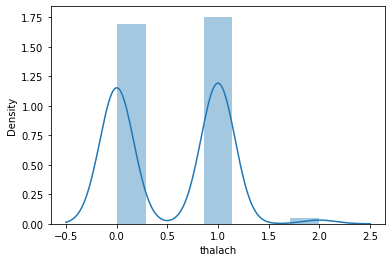

In [23]:
ax = sns.distplot(df['thalach'])

In [24]:
df["thal"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: thal, dtype: int64

In [25]:
#Number of people suffering from heart disease
s=0
for i in df['target']:
    if (i==1):
        s=s+1
    else:
        continue
print(s)

18


<AxesSubplot:xlabel='target', ylabel='count'>

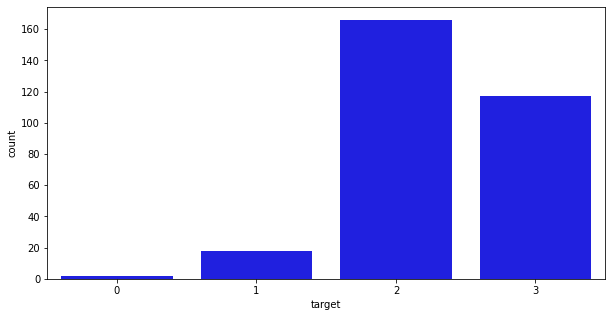

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['target'],color='blue')

In [27]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (242, 13) (242,)
shape of X and y respectively (test) : (61, 13) (61,)


In [30]:
print(df.corr()["target"].abs().sort_values(ascending=False))
     

target      1.000000
slope       0.210244
cp          0.210041
oldpeak     0.206754
trestbps    0.161736
thal        0.151832
ca          0.104764
fbs         0.098803
exang       0.096439
 sex        0.068001
chol        0.062210
age         0.033942
restecg     0.032019
thalach     0.011981
Name: target, dtype: float64


2    166
3    117
1     18
0      2
Name: target, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


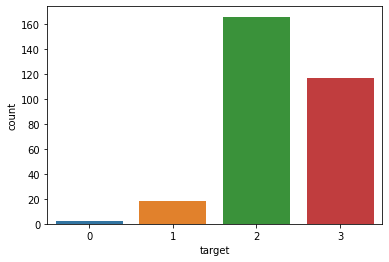

In [33]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

print(target_temp)

In [34]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))
     

Percentage of patience without heart problems: 0.66
Percentage of patience with heart problems: 5.94


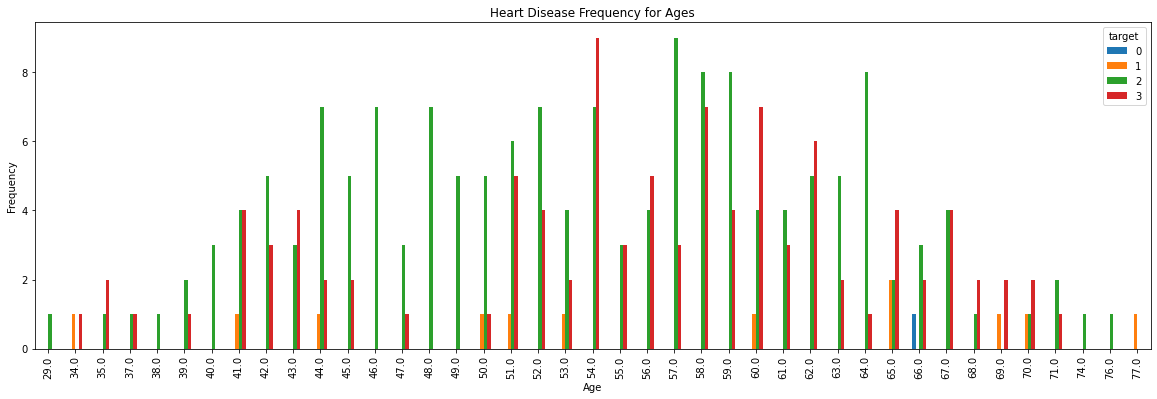

In [37]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [39]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
     

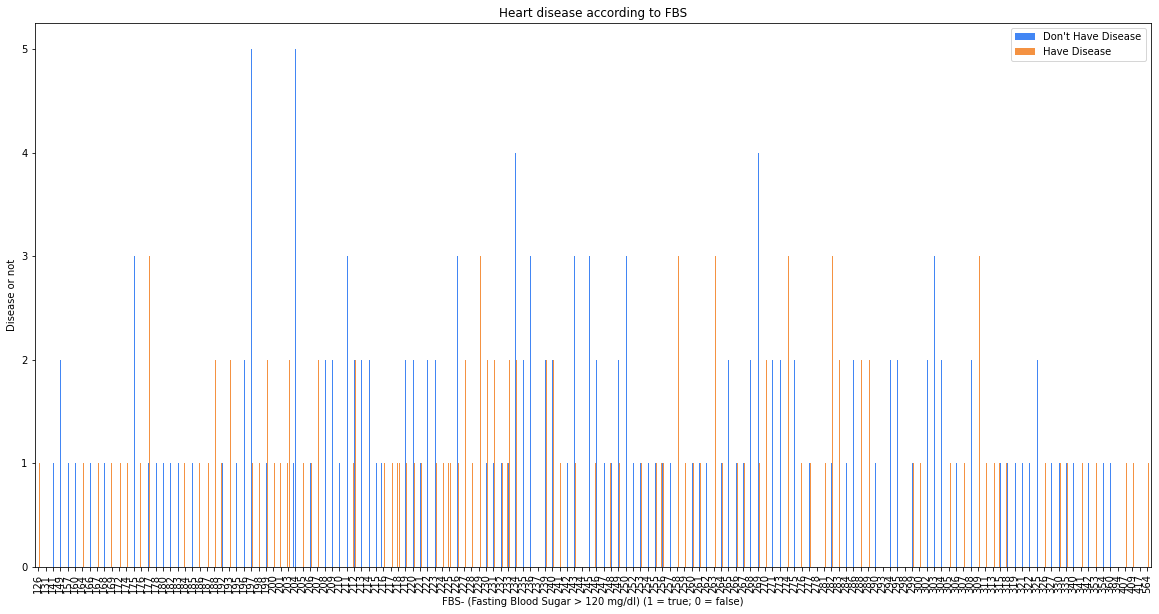

In [41]:
#Heart disease according to Fasting Blood sugar
pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [42]:
#CHEST PAIN
df["chest_pain_type"].unique()
     

array([1, 0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='chest_pain_type', ylabel='target'>

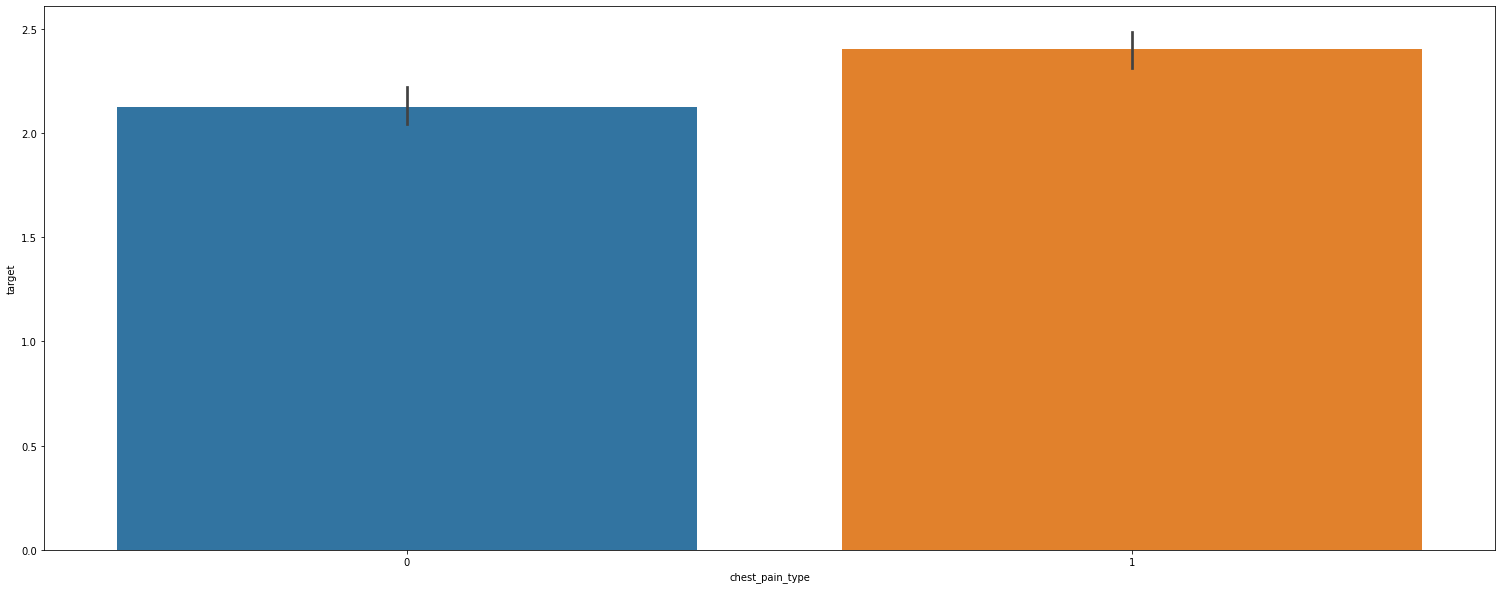

In [43]:
plt.figure(figsize=(26, 10))
sns.barplot(df["chest_pain_type"],y)

In [44]:
df["resting_blood_pressure"].unique()

array([3, 2, 1, 0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='resting_blood_pressure', ylabel='target'>

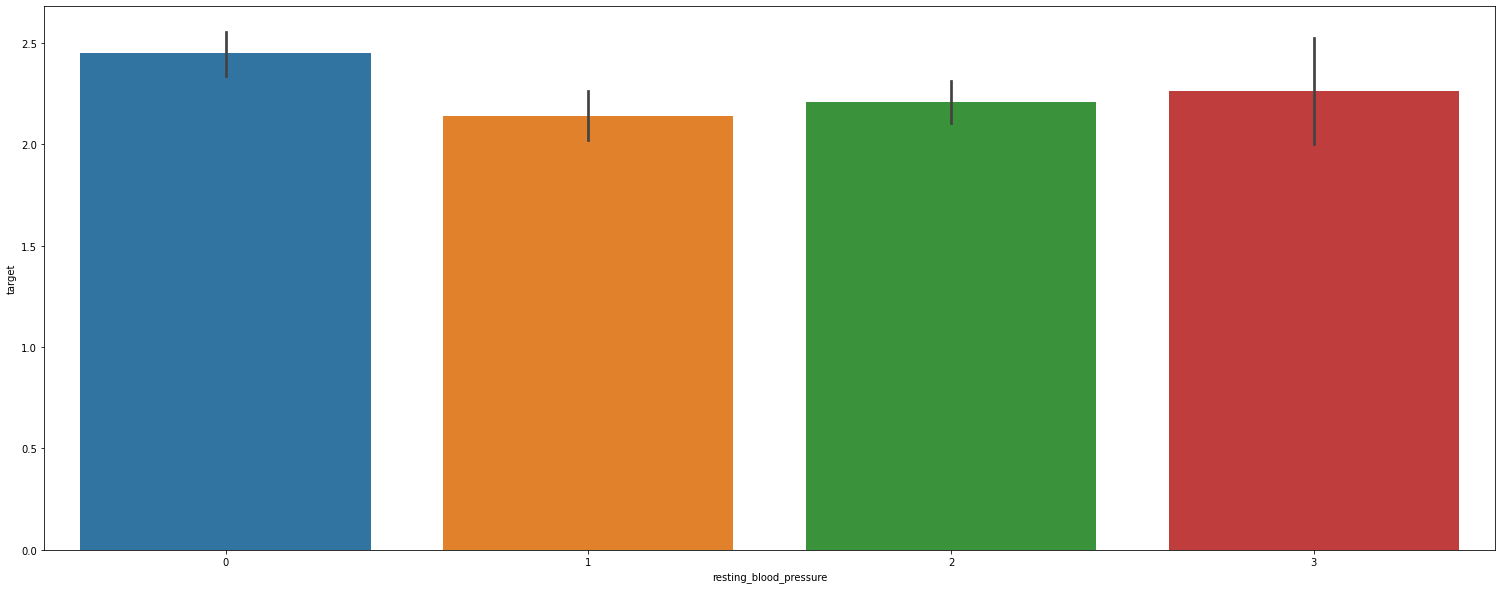

In [45]:
plt.figure(figsize=(26, 10))
sns.barplot(df["resting_blood_pressure"],y)

In [46]:
df["rest_ecg"].unique()

array([1, 0])

In [ ]:
data["exercise_induced_angina"].unique()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='exercise_induced_angina', ylabel='target'>

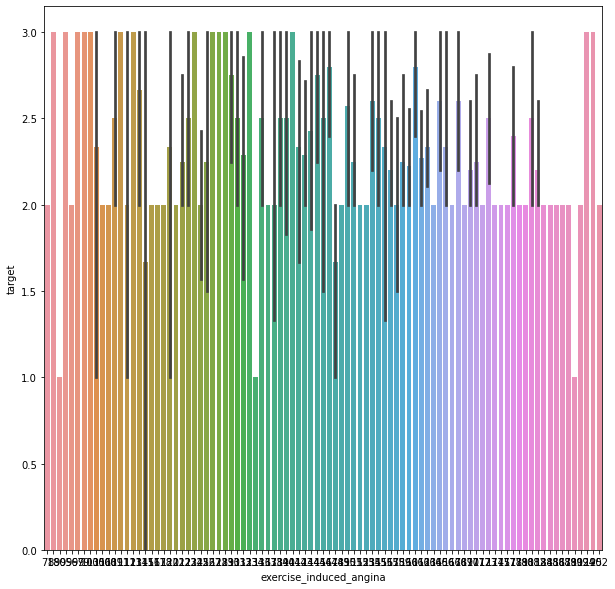

In [48]:
plt.figure(figsize=(10, 10))
sns.barplot(df["exercise_induced_angina"],y)

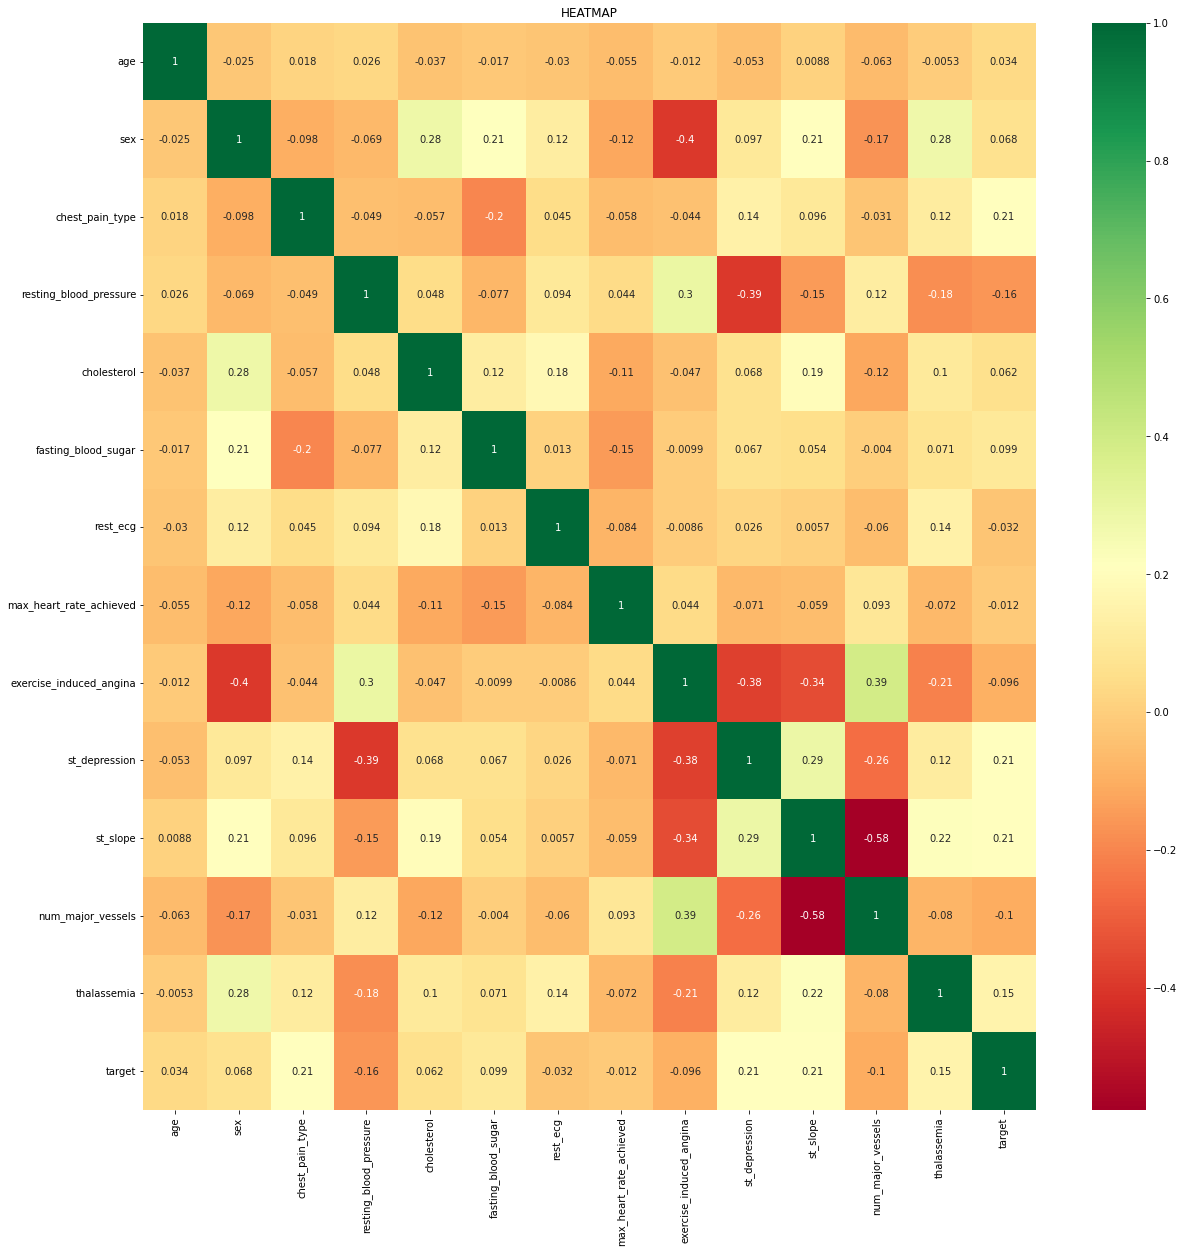

In [49]:
cor=df.corr()
top_corr_feature=cor.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()
